## Homework 06: Optimization in Python

## Due Date: March 29, 2021, 4:00pm

#### Firstname Lastname: WenxinZhang

#### E-mail: wz2164@nyu.edu

#### Enter your solutions and submit this notebook

In [1]:
# Import functions

In [2]:
from scipy import optimize
from jax import jit, grad, hessian

import matplotlib.pyplot as plt
import numpy as np
import sympy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 270$. 


1.1. (15p)
Cast the problem as a nonlinear two-dimensional optimization problem over with box constraints (*hint*: remove the sum constraint, and ignore one of the positivity constraints which should not be violated with proper initialization) and solve it using the L-BFGS-B method of `scipy.optimize.minimize`.

1.2. (15p)
Cast the problem as an equivalent one-dimensional constrained optimization problem (*hint*: after removing the sum constraint, can you further use optimality conditions to remove one more variable?), and solve it using `scipy.optimize.minimize_scalar`.



### Answer to Problem 1

### - Answer to 1.1

In [3]:
def f_1(X):
    x, y = X
    return - x * y * (270 - x - y)

bnd_x1, bnd_x2 = (0, 270), (0, 270)

#'L-BFGS-B limited-memory with bound constraints
optimized_x, optimized_y = optimize.minimize(f_1, np.array([1, 1]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x

optimized_z = 270 - optimized_x - optimized_y

print('Using the L-BFGS-B method, it\'s concluded that:') 
print(f'(x, y, z) such as {(round(optimized_x,4), round(optimized_y,4), round(optimized_z, 4))} would maximize P=xyz with the constraint that x+y+z=270')
print(f'And the according maximized P equals to {round(optimized_x*optimized_y*optimized_z,4)}')
      

Using the L-BFGS-B method, it's concluded that:
(x, y, z) such as (90.0, 90.0, 90.0) would maximize P=xyz with the constraint that x+y+z=270
And the according maximized P equals to 729000.0


### -  Answer to 1.2

In [4]:
def f_2(x):
    return - x * ((270 - x) / 2)**2

#'L-BFGS-B limited-memory with bound constraints
optimized_x = optimize.minimize_scalar(f_2, method='bounded', bounds=(0, 270)).x

optimized_y = (270 - optimized_x) / 2
optimized_z = (270 - optimized_x) / 2


print('Using the L-BFGS-B method, it\'s concluded that:') 
print(f'(x, y, z) such as {(round(optimized_x,4), round(optimized_y,4), round(optimized_z, 4))} would maximize P=xyz with the constraint that x+y+z=270')
print(f'And the according maximized P equals to {round(optimized_x*optimized_y*optimized_z,4)}')
      

Using the L-BFGS-B method, it's concluded that:
(x, y, z) such as (90.0, 90.0, 90.0) would maximize P=xyz with the constraint that x+y+z=270
And the according maximized P equals to 729000.0


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 17)^2.$$
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").


Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are multiple extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point report: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are both local mimima and maxima; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate stationary points, partition $-10 \leq x, y \leq 10$ into multiple regions and use "optimize.brute" in each of these regions. Then use the resulting points as starting points in "scipy.optimize.fmin_ncg".


### Answer to Problem 2

### - Initialization

In [5]:
x, y = sympy.symbols("x, y")
h_xy = (x**2 + y - 10) ** 2 + (x + y**2 - 17)**2

fprime_implemented = [h_xy.diff(x_) for x_ in (x, y)]
fhessian_implemented = [[h_xy.diff(u, v) for u in (x, y)] for v in (x, y)]
sympy.Matrix(fprime_implemented)
sympy.Matrix(fhessian_implemented)

h_lam = sympy.lambdify((x, y), h_xy, 'numpy')
fprime_lam = sympy.lambdify((x, y), fprime_implemented, 'numpy')
fhessian_lam = sympy.lambdify((x, y), fhessian_implemented, 'numpy')

def func_to_vector(f):
    return lambda x: np.array(f(x[0], x[1]))

h = func_to_vector(h_lam)
h_prime = func_to_vector(fprime_lam)
h_hessian = func_to_vector(fhessian_lam)


Matrix([
[4*x*(x**2 + y - 10) + 2*x + 2*y**2 - 34],
[2*x**2 + 4*y*(x + y**2 - 17) + 2*y - 20]])

Matrix([
[2*(6*x**2 + 2*y - 19),             4*(x + y)],
[            4*(x + y), 2*(2*x + 6*y**2 - 33)]])

In [6]:
x_start_1 = optimize.brute(h, (slice(0, 10, 0.5), slice(0, 10, 0.5))) 
x_start_2 = optimize.brute(h, (slice(-10, 0, 0.5), slice(0, 10, 0.5))) 
x_start_3 = optimize.brute(h, (slice(-10, 0, 0.5), slice(-10, 0, 0.5))) 
x_start_4 = optimize.brute(h, (slice(0, 10, 0.5), slice(-10, 0, 0.5)))


### - Answer to Problem 2.1

(20p) Providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

In [7]:
print("\nMinimum in 1st quadrant:")
x_opt_1 = optimize.fmin_ncg(h, x_start_1, fprime=h_prime, fhess=h_hessian)
print("x_opt_1:", x_opt_1)
print(f'h_(x_opt_1): {h(x_opt_1)}')
print("x_start_1:", x_start_1)


print("\nMinimum in 2nd quadrant:")
x_opt_2 = optimize.fmin_ncg(h, x_start_2, fprime=h_prime, fhess=h_hessian)
print("x_opt_2:", x_opt_2)
print(f'h_(x_opt_2): {h(x_opt_2)}')
print("x_start_2:", x_start_2)

print("\nMinimum in 3rd quadrant:")
x_opt_3 = optimize.fmin_ncg(h, x_start_3, fprime=h_prime, fhess=h_hessian)
print("x_opt_3:", x_opt_3)
print(f'h_(x_opt_3): {h(x_opt_3)}')
print("x_start_3:", x_start_3)

print("\nMinimum in 4th quadrant:")
x_opt_4 = optimize.fmin_ncg(h, x_start_4, fprime=h_prime, fhess=h_hessian)
print("x_opt_4:", x_opt_4)
print(f'h_(x_opt_4): {h(x_opt_4)}')
print("x_start_4:", x_start_4)

print("\nMaximum :")
x_max = optimize.fmin_ncg(lambda x:-h(x), (0,0), fprime=lambda x:-h_prime(x), fhess=lambda x:-h_hessian(x))
print("x_max:", x_max)
print(f'h_(x_max): {h(x_max)}')
print("x_start:", [0, 0])



Minimum in 1st quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
x_opt_1: [2.48808134 3.80945123]
h_(x_opt_1): 0.0
x_start_1: [2.48810154 3.80946346]

Minimum in 2nd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
x_opt_2: [-2.36628111  4.4007137 ]
h_(x_opt_2): 3.0480730252518637e-23
x_start_2: [-2.36632417  4.40071807]

Minimum in 3rd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 2
x_opt_3: [-3.81607969 -4.56246421]
h_(x_opt_3): 3.1554436208840472e-30
x_start_3: [-3.81611395 -4.56248642]

Minimum in 4th qu

### - Answer to Problem 2.2

(20p) Providing only gradient (fprime) in "scipy.optimize.fmin_ncg"


In [8]:
print("\nMinimum in 1st quadrant:")
x_opt_1 = optimize.fmin_ncg(h, x_start_1, fprime=h_prime)
print("x_opt_1:", x_opt_1)
print(f'h_(x_opt_1): {h(x_opt_1)}')
print("x_start_1:", x_start_1)

print("\nMinimum in 2nd quadrant:")
x_opt_2 = optimize.fmin_ncg(h, x_start_2, fprime=h_prime)
print("x_opt_2:", x_opt_2)
print(f'h_(x_opt_2): {h(x_opt_2)}')
print("x_start_2:", x_start_2)

print("\nMinimum in 3rd quadrant:")
x_opt_3 = optimize.fmin_ncg(h, x_start_3, fprime=h_prime)
print("x_opt_3:", x_opt_3)
print(f'h_(x_opt_3): {h(x_opt_3)}')
print("x_start_3:", x_start_3)

print("\nMinimum in 4th quadrant:")
x_opt_4 = optimize.fmin_ncg(h, x_start_4, fprime=h_prime)
print("x_opt_4:", x_opt_4)
print(f'h_(x_opt_4): {h(x_opt_4)}')
print("x_start_4:", x_start_4)

print("\nMaximum :")
x_max = optimize.fmin_ncg(lambda x:-h(x), (0,0), fprime=lambda x:-h_prime(x))
print("x_max:", x_max)
print(f'h_(x_max): {h(x_max)}')
print("x_start:", [0, 0])



Minimum in 1st quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 8
         Hessian evaluations: 0
x_opt_1: [2.48808134 3.80945123]
h_(x_opt_1): 3.913260704098494e-18
x_start_1: [2.48810154 3.80946346]

Minimum in 2nd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 10
         Hessian evaluations: 0
x_opt_2: [-2.36628111  4.4007137 ]
h_(x_opt_2): 1.2440635210554613e-18
x_start_2: [-2.36632417  4.40071807]

Minimum in 3rd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 9
         Hessian evaluations: 0
x_opt_3: [-3.81607969 -4.56246421]
h_(x_opt_3): 4.618710602863182e-19
x_start_3: [-3.81611395 -4.56248642]


### - Answer to Problem 2.3

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

(20p) Not providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").

In [9]:
print("\nMinimum in 1st quadrant:")
x_opt_1 = optimize.fmin_bfgs(h, x_start_1)
print("x_opt_1:", x_opt_1)
print(f'h_(x_opt_1): {h(x_opt_1)}')
print("x_start_1:", x_start_1)

print("\nMinimum in 2nd quadrant:")
x_opt_2 = optimize.fmin_bfgs(h, x_start_2)
print("x_opt_2:", x_opt_2)
print(f'h_(x_opt_2): {h(x_opt_2)}')
print("x_start_2:", x_start_2)

print("\nMinimum in 3rd quadrant:")
x_opt_3 = optimize.fmin_bfgs(h, x_start_3)
print("x_opt_3:", x_opt_3)
print(f'h_(x_opt_3): {h(x_opt_3)}')
print("x_start_3:", x_start_3)

print("\nMinimum in 4th quadrant:")
x_opt_4 = optimize.fmin_bfgs(h, x_start_4)
print("x_opt_4:", x_opt_4)
print(f'h_(x_opt_4): {h(x_opt_4)}')
print("x_start_4:", x_start_4)

print("\nMaximum :")
x_max = optimize.fmin_bfgs(lambda x:-h(x), (0,0))
print("x_max:", x_max)
print(f'h_(x_max): {h(x_max)}')
print("x_start:", [0, 0])



Minimum in 1st quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
x_opt_1: [2.48808134 3.80945122]
h_(x_opt_1): 3.334783025101365e-15
x_start_1: [2.48810154 3.80946346]

Minimum in 2nd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
x_opt_2: [-2.3662811  4.4007137]
h_(x_opt_2): 5.1372098563556375e-15
x_start_2: [-2.36632417  4.40071807]

Minimum in 3rd quadrant:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
x_opt_3: [-3.81607968 -4.5624642 ]
h_(x_opt_3): 9.265557730970313e-15
x_start_3: [-3.81611395 -4.56248642]

Minimum in 4th quadrant:
Optimization terminated successfully.
         Current function value:

### - Answer to Problem 2.4

Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).

(10p) Plot  ℎ(𝑥,𝑦)  in the given region  −10≤𝑥,𝑦≤10 .

In [10]:
# Use JAX to make sure the gradient and Hessian are correctly computed

def h(x):
    return (x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2

def minus_h(x):
    return -((x[0]**2 + x[1] - 10)**2 + (x[0] + x[1]**2 - 17)**2)

h = jit(h)
h_prime = jit(grad(h))
h_hessian = jit(hessian(h))

# JAX
x = np.array([1., 1.])
h_prime(x_opt_1)
h_prime(x_opt_2)
h_prime(x_opt_3)
h_prime(x_opt_4)
h_prime(x_max)

h_hessian(x_opt_1)
h_hessian(x_opt_2)
h_hessian(x_opt_3)
h_hessian(x_opt_4)
h_hessian(x_max)

DeviceArray([0., 0.], dtype=float32)

DeviceArray([3.8146973e-06, 3.3574783e-05], dtype=float32)

DeviceArray([ 1.45571885e-05, -1.90734863e-06], dtype=float32)

DeviceArray([-3.8146973e-06,  2.7829747e-05], dtype=float32)

DeviceArray([-3.8146973e-06,  1.9073486e-06], dtype=float32)

DeviceArray([[ 51.524395,  25.19013 ],
             [ 25.19013 , 118.095345]], dtype=float32)

DeviceArray([[ 46.79429 ,   8.137732],
             [  8.137732, 156.93027 ]], dtype=float32)

DeviceArray([[118.49971 , -33.514175],
             [-33.514175, 168.52864 ]], dtype=float32)

DeviceArray([[111.1816    ,   0.18631554],
             [  0.18631554, 108.44575   ]], dtype=float32)

DeviceArray([[-28.051699,  -4.8733  ],
             [ -4.8733  , -69.00981 ]], dtype=float32)

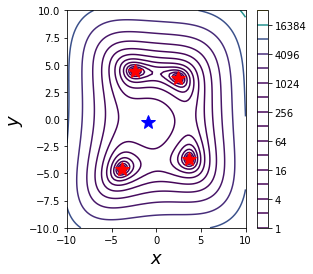

In [11]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(4, 4))
x_points = y_points = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_points, y_points)
cf_lv = [2**x for x in range(16)]
c = ax.contour(X, Y, func_X_Y_to_XY(h, X, Y), levels=cf_lv)

ax.plot(x_opt_1[0], x_opt_1[1], 'r*', markersize=15)
ax.plot(x_opt_2[0], x_opt_2[1], 'r*', markersize=15)
ax.plot(x_opt_3[0], x_opt_3[1], 'r*', markersize=15)
ax.plot(x_opt_4[0], x_opt_4[1], 'r*', markersize=15)
ax.plot(x_max[0], x_max[1], 'b*', markersize=15)


ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
plt.colorbar(c, ax=ax)
plt.show();
